# Tensors

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
# Labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

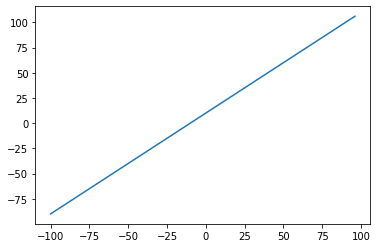

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y)

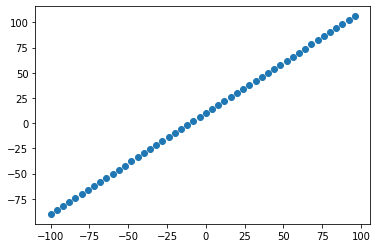

In [5]:
plt.scatter(X, y)

In [6]:
# Creating train / test datasets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [7]:
len(X_train), len(X_test)

(40, 10)

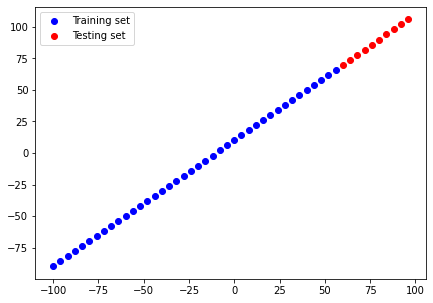

In [8]:
from cProfile import label


plt.figure(figsize=(7, 5))
# Plotting training data
plt.scatter(X_train, y_train, c="b", label="Training set")
# Plotting testing data
plt.scatter(X_test, y_test, c="r", label="Testing set")
# Show a legend
plt.legend()

In [9]:
# Creating NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 21.0082 - mae: 21.0082
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0811 - mae: 10.0811
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 13.3171 - mae: 13.3171
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1010 - mae: 11.1010
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.5903 - mae: 13.5903
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4945 - mae: 8.4945
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 14.8908 - mae: 14.8908
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.7022 - mae: 10.7022
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2593 - mae: 10.2593
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 8.8657 - mae: 8.8657
Epoch 11/100
2/2 [==============================] - 0s 8ms/

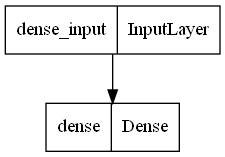

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

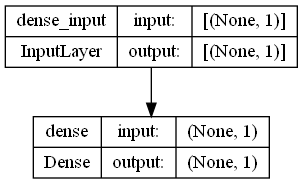

In [13]:
plot_model(model=model, show_shapes=True)

In [14]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 352ms/step


array([[ 67.48137 ],
       [ 71.88942 ],
       [ 76.29747 ],
       [ 80.70552 ],
       [ 85.11357 ],
       [ 89.52162 ],
       [ 93.929665],
       [ 98.337715],
       [102.745766],
       [107.15382 ]], dtype=float32)

In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [16]:
# Function to visualise the outcomes of ML training, testing and predictions
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize=(7, 5))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

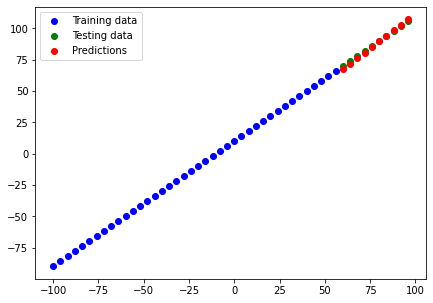

In [17]:
plot_predictions()

# Model Evaluation

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 516ms/step - loss: 1.1299 - mae: 1.1299


[1.1298660039901733, 1.1298660039901733]

In [19]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

# INCORRECT VALUE IS CAUSED BY DIFFERENCES IN TENSOR SHAPES

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.518631, 16.488464, 13.421518, 11.317792, 10.177286, 10.      ,
       10.785933, 12.602629, 15.396612, 19.153816], dtype=float32)>

In [20]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.48137 ,  71.88942 ,  76.29747 ,  80.70552 ,  85.11357 ,
        89.52162 ,  93.929665,  98.337715, 102.745766, 107.15382 ],
      dtype=float32)>

In [21]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.129866>

In [22]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.8393395>

# Comparing 3 models with various params

## Model 1

In [30]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


In [31]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 67.7145 - mae: 67.7145
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 31.8938 - mae: 31.8938
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7667 - mae: 9.7667
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5249 - mae: 9.5249
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.5077 - mae: 14.5077
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3065 - mae: 10.3065
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2920 - mae: 11.2920
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4286 - mae: 11.4286
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6276 - mae: 8.6276
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 8.8039 - mae: 8.8039
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 40ms/step


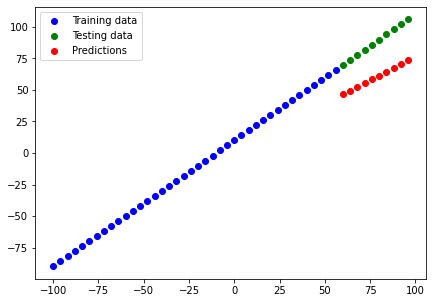

In [53]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [37]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=20.525019>,
 <tf.Tensor: shape=(), dtype=float32, numpy=429.40958>)

## Model 2

In [41]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [42]:
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 31.4242 - mae: 31.4242
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 39.6938 - mae: 39.6938
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 37.6811 - mae: 37.6811
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 7.5147 - mae: 7.5147
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 25.5464 - mae: 25.5464
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7878 - mae: 7.7878
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 17.1944 - mae: 17.1944
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 21.0044 - mae: 21.0044
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2194 - mae: 13.2194
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 18.3835 - mae: 18.3835
Epoch 11/100
2/2 [==============================] - 0s 3ms/st

1/1 [==============================] - 0s 44ms/step


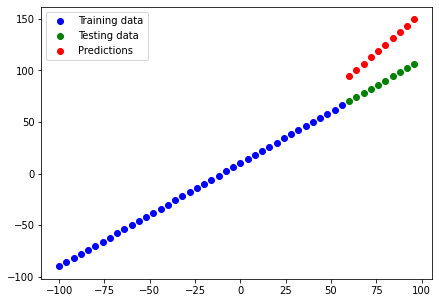

In [52]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [45]:
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=49.060436>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2444.9783>)

## Model 3

In [47]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [48]:
model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 8ms/step - loss: 44.4494 - mae: 44.4494
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 28.8691 - mae: 28.8691
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 27.0987 - mae: 27.0987
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 32.7561 - mae: 32.7561
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 19.4432 - mae: 19.4432
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 20.1013 - mae: 20.1013
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 11.9933 - mae: 11.9933
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 14.7675 - mae: 14.7675
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 7.6429 - mae: 7.6429
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 17.3615 - mae: 17.3615
Epoch 11/200
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 43ms/step


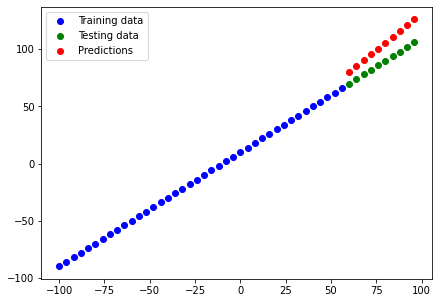

In [51]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [54]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=15.2021055>,
 <tf.Tensor: shape=(), dtype=float32, numpy=241.20206>)